# How to load and use FOGGIE data

## Python packages needed:
* numpy
* scipy
* astropy
* matplotlib
* yt
* datashader
* seaborn

## Installing the FOGGIE GitHub repo
1. Make a directory where you'd like to store the FOGGIE code
2. Go into that directory in a terminal and type

    \> git clone https://github.com/foggie-sims/foggie
3. Open your .bash_profile or .cshrc or .tcshrc or .zshrc, whichever file is your terminal profile. Add this line:

    export PYTHONPATH="/path/to/foggie/directory:${PYTHONPATH}"
    
    and change the path to wherever you're storing the FOGGIE code.

## FOGGIE Simulation Data

There are six directories for the six halos: halo_00XXXX where XXXX is the halo ID.

Within each halo directory, there is another directory called nref11c_nref9f -- this is the refinement scheme for the run and means level 11 cooling refinement and level 9 forced refinement.

Finally, within the nref11c_nref9f directories are all the time snapshots for all the halos, which are called DD1234 or RD0012, for example. The DD's are spaced every 5.38 Myr and the RD's are spaced at certain redshifts (z = 2.5, 2.25, 2.0, 1.75, 1.5, 1.4, 1.3, etc).

### Halo ID and name matching:
* Tempest: 8508
* Squall: 5016
* Maelstrom: 5036
* Blizzard: 4123
* Hurricane: 2392
* Cyclone: 2878

There is some basic information about the five galaxies that have reached z = 0 in Table 1 of Wright et al. (2023): https://ui.adsabs.harvard.edu/abs/2023arXiv230910039W/abstract

\begin{array}{c c c c c}
\mathrm{Name} & R_\mathrm{vir} & M_\mathrm{vir} & M_\star & M_\mathrm{SH} \\
  & [\mathrm{kpc}] & [10^{12} M_\odot] & [10^{10} M_\odot] & [10^{10} M_\odot] \\\hline
\mathrm{Tempest} & 201 & 0.45 & 5.44 & 0.32 \\
\mathrm{Maelstrom} & 253 & 0.90 & 11.6 & 0.86 \\
\mathrm{Squall} & 235 & 0.76 & 12.6 & 1.20 \\
\mathrm{Blizzard} & 261 & 0.99 & 14.7 & 1.76 \\
\mathrm{Hurricane} & 301 & 1.05 & 25.7 & 2.50
\end{array}

## Using code in the FOGGIE repo

Include at least these imports:

In [1]:
import yt  # Simulation plotting package
import matplotlib.pyplot as plt  # General purpose plotting
import matplotlib as mpl
%matplotlib widget

import numpy as np   # General purpose math and array manipulation

# These are FOGGIE-specific functions that make loading in the dataset easier
from foggie.utils.consistency import *
from foggie.utils.yt_fields import *
from foggie.utils.foggie_load import *
from foggie.utils.analysis_utils import *

Now we need to specify the file directory paths to where various pieces are stored. Be sure to change these to wherever you've put the files!!!

In [2]:
foggie_dir = "/path/to/data/storage/FOGGIE_data/halo_005036/nref11c_nref9f/"  # Path to where the simulation data itself is stored. CHANGE THIS TO YOUR OWN DIRECTORY PATH
code_path = "/path/to/code/storage/foggie/foggie/"  # Path to where the FOGGIE code you downloaded from GitHub is stored. CHANGE THIS TO YOUR OWN DIRECTORY PATH

# These next two are needed for finding the galaxy halo we're interested in from the whole dataset. If you're using a different halo, change only the halo ID number (ex. here is 5036)
halo_c_v_name = code_path + 'halo_infos/005036/nref11c_nref9f/halo_c_v'
track_name = code_path + 'halo_tracks/005036/nref11n_selfshield_15/halo_track_200kpc_nref9'

# Finally, specify which snapshot you want to load in.
snap = 'DD2520'
snap_name = foggie_dir + snap + '/' + snap

Use yt for loading and examining simulation data: https://yt-project.org/doc/

We have our own function that replaces yt.load() called foggie_load(). It returns a data structure, 'ds', just like yt.load(), and also a yt data object 'refine_box' that is just the high-resolution region. It sets up finding the galaxy halo and a few other important pieces, but otherwise everything is still within the framework of yt.

In [ ]:
ds, refine_box = foggie_load(snap_name, trackfile_name=track_name, halo_c_v_name=halo_c_v_name)

yt : [INFO     ] 2024-06-04 14:06:12,369 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2024-06-04 14:06:12,369 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2024-06-04 14:06:12,370 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-04 14:06:12,370 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-04 14:06:12,370 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-06-04 14:06:12,370 Parameters: current_redshift          = 0
yt : [INFO     ] 2024-06-04 14:06:12,371 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2024-06-04 14:06:12,371 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2024-06-04 14:06:12,371 Parameters: omega_radiation           = 0
yt : [INFO     ] 2024-06-04 14:06:12,372 Parameters: hubble_constant           = 0.695


Opening snapshot /Users/clochhaas/Documents/Research/FOGGIE/Simulation_Data/halo_005036/nref11c_nref9f/DD2520/DD2520
get_refine_box: using this location: col1   col2     col3     col4     col5     col6     col7   col8
---- -------- -------- -------- -------- -------- -------- ----
 0.0 0.465138 0.500866 0.499993 0.467138 0.502866 0.501993    9


Parsing Hierarchy : 100%|██████████| 6145/6145 [00:00<00:00, 21508.73it/s]
yt : [INFO     ] 2024-06-04 14:06:12,854 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file
filtering young_stars particles...
filtering young_stars3 particles...
filtering young_stars8 particles...
filtering old_stars particles...
filtering stars particles...
filtering dm particles...


There are several necessary variables and fields that foggie_load sets up for you:

* ds.halo_center_kpc: This is an array of [x, y, z] position of the center of the halo (defined as dark matter density peak)
* ds.halo_velocity_kms: This is an array of [v_x, v_y, v_z] velocity vector of the center of the halo (defined as bulk velocity of the stars and dark matter particles within 3 kpc of the halo center)
* ds.refine_width: This is the size of the "refine box" - the high-resolution halo track box
* If you give foggie_load the optional argument 'disk_relative = True', then ds.z_unit_disk is an array of [n_x, n_y, n_z] normal vector of the galaxy's angular momentum (defined using stars with ages less than 10 Myr within 15 kpc of halo center). ds.x_unit_disk and ds.y_unit_disk are also defined and they are the orthogonal vectors within the plane of the galaxy disk.
* If you don't care about stars or dark matter particles and want foggie_load to run faster, give it the optional argument 'filter_particles = False'.
* foggie_load() adds some new fields that are corrected for the location and motion of the halo through the cosmological domain:
    - ('gas', 'vx_corrected'), ('gas', 'vy_corrected'), and ('gas', 'vz_corrected') should be used instead of ('gas', 'velocity_x'), ('gas', 'velocity_y'), and ('gas', 'velocity_z'). They are corrected for the motion of the halo, so the halo center is defined at zero velocity in all three directions.
    - Likewise, ('gas', 'vel_mag_corrected') and ('gas', 'radial_velocity_corrected') should be used for velocity magnitude and radial velocity (negative is toward halo center, positive is away from halo center)
* foggie_load() calculates some spherical coordinates too. NOTE these are relative to the (arbitrary) code coordinates, NOT relative to the galaxy disk:
    - ('gas', 'radius_corrected'), ('gas', 'theta_pos'), and ('gas', 'phi_pos') give the $r$, $\theta$, $\phi$ coordinates relative to the halo center ($\theta$ is azimuth and $\phi$ is altitude)
    - ('gas', 'theta_velocity_corrected') and ('gas', 'phi_velocity_corrected') give the two directions of the velocity tangential to the radial velocity, the azimuthal velocity ($\theta$) and the altitudinal velocity ($\phi$)
    - If you've passed the optional argument 'disk_relative = True', then there are some additional fields:
        - ('gas', 'x_disk'), ('gas', 'y_disk'), and ('gas', 'z_disk') are the x, y, z positions of each gas cell relative to the galaxy disk (z is minor axis, x and y are in disk plane)
        - ('gas', 'vx_disk'), ('gas', 'vy_disk'), and ('gas', 'vz_disk') are the disk-relative x, y, z velocities
        - ('gas', 'phi_pos_disk') and ('gas', 'theta_pos_disk') are the altitude and azimuth positions of each gas cell relative to the galaxy disk ($\phi = 0$ and $\phi = \pi$ are the north and south poles of the galaxy disk, $\theta$ goes from 0 to $2\pi$ around in the plane of the disk)
        - ('gas', 'vphi_disk') and ('gas', 'vtheta_disk') are the two directions of the tangential velocity relative to the galaxy disk
* Particle filtering: foggie_load() defines particles as either 'stars' or 'dm' (dark matter), and further splits up stars into 'young_stars' (ages less than 10 Myr), 'old_stars' (ages greater than 10 Myr), and 'young_stars8' (ages less than 100 Myr)

* foggie_load() also returns 'refine_box' in addition to 'ds'. 'refine_box' is a yt data object that contains only the data inside the high-resolution halo track box.

## Example projections and slices for FOGGIE

yt : [INFO     ] 2024-06-04 14:06:17,563 Projection completed
yt : [INFO     ] 2024-06-04 14:06:17,564 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-06-04 14:06:17,564 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-06-04 14:06:17,565 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-06-04 14:06:17,566 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-06-04 14:06:17,567 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



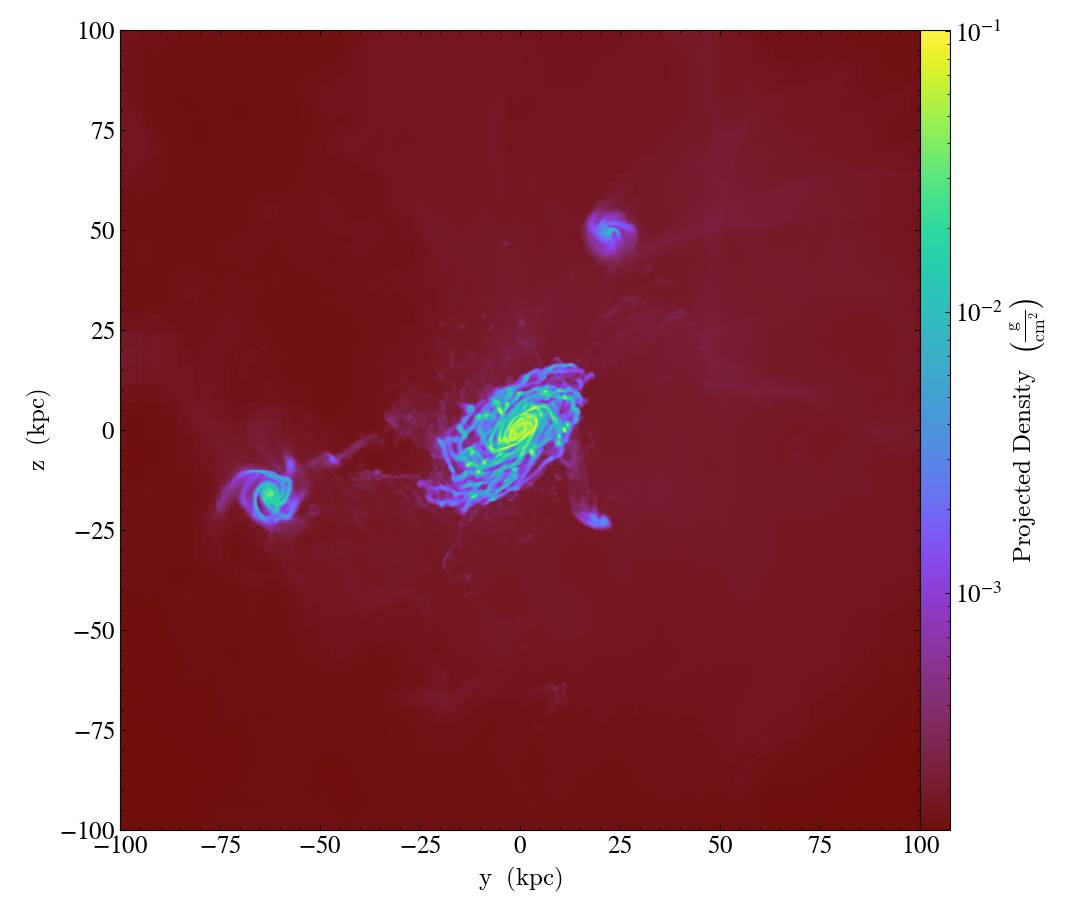

In [4]:
# Density projection centered on the galaxy
plot = yt.ProjectionPlot(ds, 'x', ('gas','density'), center=ds.halo_center_kpc, width=(200., 'kpc'))
plot.show()

yt : [INFO     ] 2024-06-04 14:06:18,038 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2024-06-04 14:06:18,038 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2024-06-04 14:06:18,038 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-04 14:06:18,039 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-04 14:06:18,039 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-06-04 14:06:18,039 Parameters: current_redshift          = 0
yt : [INFO     ] 2024-06-04 14:06:18,039 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2024-06-04 14:06:18,040 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2024-06-04 14:06:18,040 Parameters: omega_radiation           = 0
yt : [INFO     ] 2024-06-04 14:06:18,040 Parameters: hubble_constant           = 0.695


Opening snapshot /Users/clochhaas/Documents/Research/FOGGIE/Simulation_Data/halo_005036/nref11c_nref9f/DD2520/DD2520
get_refine_box: using this location: col1   col2     col3     col4     col5     col6     col7   col8
---- -------- -------- -------- -------- -------- -------- ----
 0.0 0.465138 0.500866 0.499993 0.467138 0.502866 0.501993    9


Parsing Hierarchy : 100%|██████████| 6145/6145 [00:00<00:00, 17125.88it/s]
yt : [INFO     ] 2024-06-04 14:06:18,492 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2024-06-04 14:06:18,796 The young_stars particle filter already exists. Overriding.
yt : [WARNING  ] 2024-06-04 14:06:18,801 The young_stars3 particle filter already exists. Overriding.
yt : [WARNING  ] 2024-06-04 14:06:18,805 The young_stars8 particle filter already exists. Overriding.
yt : [WARNING  ] 2024-06-04 14:06:18,809 The old_stars particle filter already exists. Overriding.
yt : [WARNING  ] 2024-06-04 14:06:18,814 The stars particle filter already exists. Overriding.
yt : [WARNING  ] 2024-06-04 14:06:18,819 The dm particle filter already exists. Overriding.


Pulling halo center from catalog file
filtering young_stars particles...
filtering young_stars3 particles...
filtering young_stars8 particles...
filtering old_stars particles...
filtering stars particles...
filtering dm particles...
using particle type  young_stars  to derive angular momentum


yt : [INFO     ] 2024-06-04 14:06:33,435 xlim = -0.000695 0.000695
yt : [INFO     ] 2024-06-04 14:06:33,436 ylim = -0.000695 0.000695
yt : [INFO     ] 2024-06-04 14:06:33,436 zlim = -0.500000 0.500000
yt : [INFO     ] 2024-06-04 14:06:33,437 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


found angular momentum vector



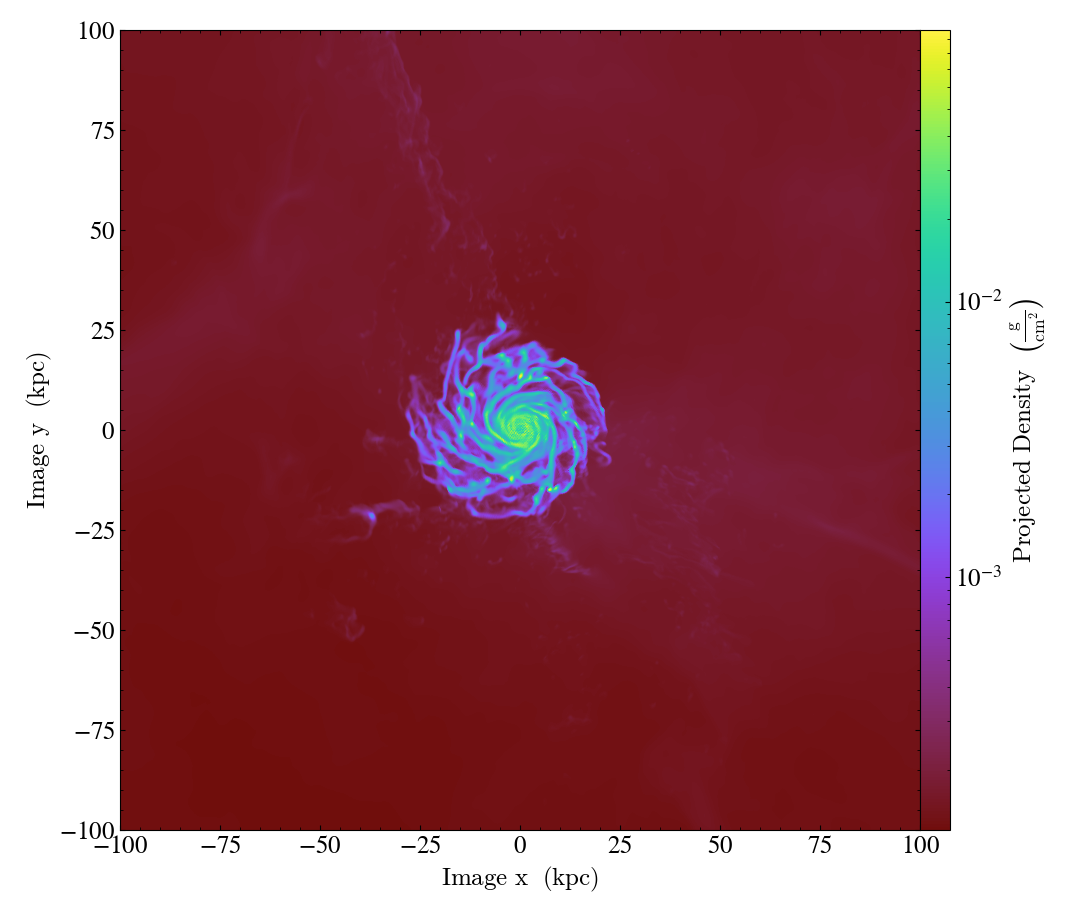

In [5]:
# Face-on and edge-on density projections
# Note: need to re-run foggie_load() with disk_relative=True
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=halo_c_v_name, disk_relative=True)

plot = yt.OffAxisProjectionPlot(ds, ds.z_unit_disk, ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'))
plot.show()

yt : [INFO     ] 2024-06-04 14:06:53,681 xlim = -0.000695 0.000695
yt : [INFO     ] 2024-06-04 14:06:53,681 ylim = -0.000695 0.000695
yt : [INFO     ] 2024-06-04 14:06:53,681 zlim = -0.500000 0.500000
yt : [INFO     ] 2024-06-04 14:06:53,682 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



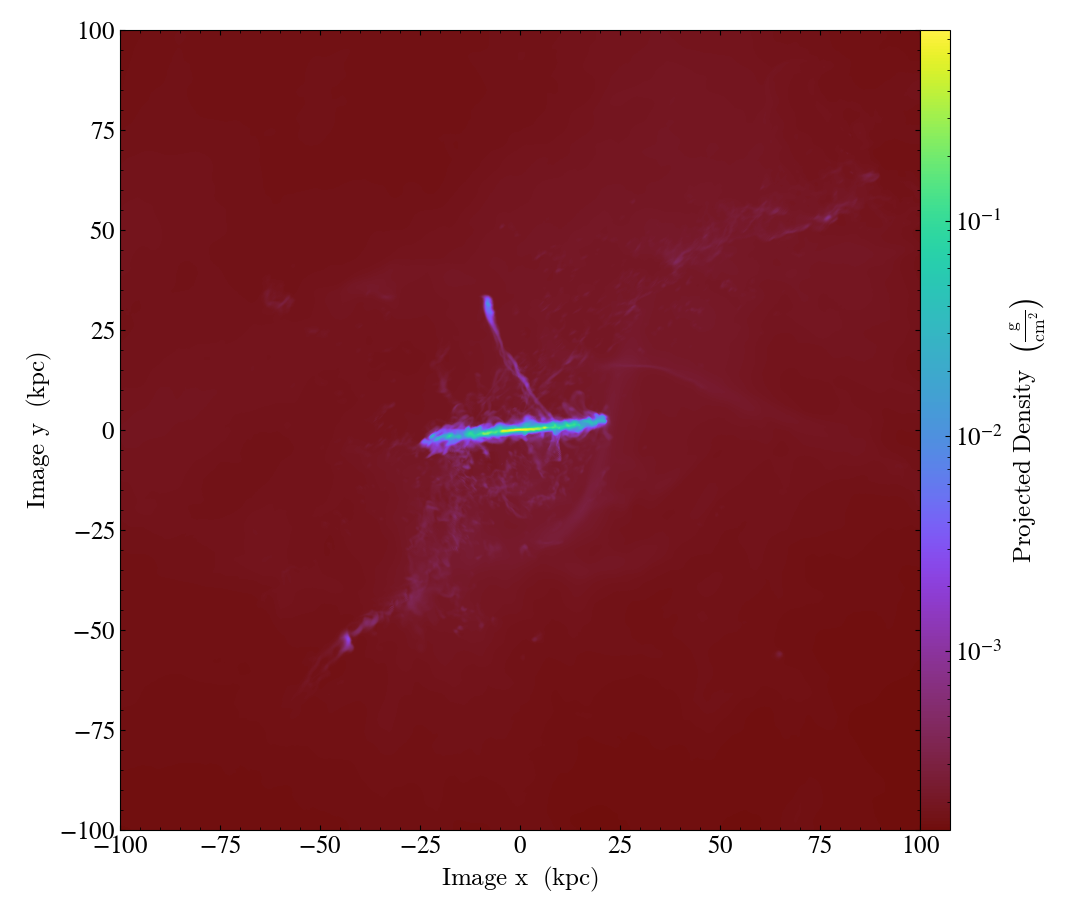

In [6]:
plot = yt.OffAxisProjectionPlot(ds, ds.x_unit_disk, ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'))
plot.show()

yt : [INFO     ] 2024-06-04 14:07:24,878 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-06-04 14:07:24,879 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-06-04 14:07:24,880 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-06-04 14:07:24,880 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-06-04 14:07:24,881 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



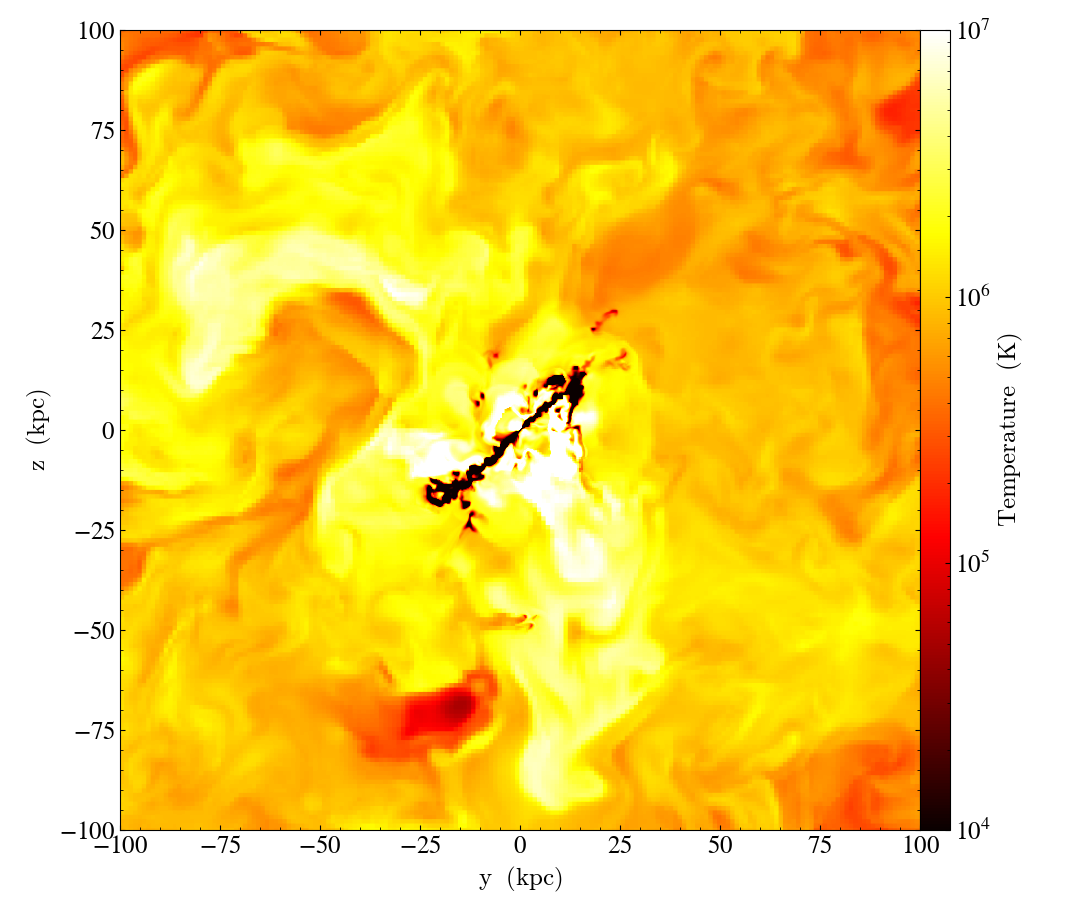

In [7]:
slice = yt.SlicePlot(ds, 'x', ('gas','temperature'), center=ds.halo_center_kpc, width=(200.,'kpc'))
slice.set_cmap(('gas','temperature'), 'hot')
slice.set_zlim(('gas','temperature'), 1e4, 1e7)
slice.show()